# PROYECTO SHARK

![enllaç](https://media.giphy.com/media/3oEduN3VLFK87V2XuM/giphy.gif)

# Suggested Ways to Get Started


Examine the data and try to understand what the fields mean before diving into data cleaning and manipulation methods.

Break the project down into different steps - use the topics covered in the lessons to form a check list, add anything else you can think of that may be wrong with your data set, and then work through the check list.

Use the tools in your tool kit - your knowledge of Python, data structures, Pandas, and data wrangling. Work through the lessons in class & ask questions when you need to! Think about adding relevant code to your project each night, instead of, you know... procrastinating.

Commit early, commit often, don’t be afraid of doing something incorrectly because you can always roll back to a previous version.

Consult documentation and resources provided to better understand the tools you are using and how to accomplish what you want.

# Steps
1- Decide on hypothesis (or hypotheses)

2- Explore the data and write down what you have found you can use: df.describe(), df["column"], etc.

3- Draw graphs that are insightful.

4- Use at least 5 data cleaning techniques inside a file named clean.ipynb null values, columns drop, duplicated data, string manipulation, apply fn, categorize, regex, etc.

5- Show data that validates the conclusions based on your hypoteses in a file named analysis.ipynb

6- Build a compelling story-telling around your findings. Think of your stakeholders and convince them with your conclusions! (Some slides with few text and pretty plots are normally useful)

7- Encapsulate your code into functions and save them into .py files: make sure you have docstrings

8- Import those functions into your jupyter notebooks and call them (you will substitue your code with your own functions)

9- Work on titles and comments to have a well presented and cohesive story in your notebook

# Hypoteshes
With the information we have in the data set, we must propose various hypotheses to which we respond:

· The first of the hypotheses that I propose is: are men more prone to fatal attacks than women?
    
    Data we need to solve this hipothesis: sex, fatal (agregated)

· The second hypothesis that I propose is: are adults suffering more fatal attacks than kids?
        
    Data we need to solve this hipothesis: location, activity

· Are there shark attacks in Spain? What activities are the attacked doing?
       
    Data we need to solve this hipothesis: species, fatal
    

In [168]:
 #import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import nan, isnan


In [243]:
pds = pd.read_csv("attacks.csv", encoding = "ISO-8859-1") #while downloading the document I encounter an error, which I look for on google and get they way of solving it
pds

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First step is to undestand what type of info we have in the columns and see which of them don't give any info at all.

In [3]:
pds.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
print(pds["Unnamed: 22"].unique())

[nan 'stopped here']


In [5]:
print(pds["Unnamed: 23"].unique())

[nan 'Teramo' 'change filename']


In [6]:
print(pds["href formula"].unique())

['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf'
 ...
 'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0003-Ocracoke_1900-1905.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0002-JulesPatterson.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf']


In [7]:
print(pds["href"].unique())

['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf'
 ...
 'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0002-JulesPatterson.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf'
 nan]


In [8]:
print(pds["Case Number.2"].unique())

['2018.06.25' '2018.06.18' '2018.06.09' ... 'ND.0002' 'ND.0001' nan]


In [244]:
to_drop = ['Unnamed: 22','Unnamed: 23','href formula','href','Case Number','Case Number.2','Case Number.1','original order','pdf','Investigator or Source']
pds.drop(to_drop, inplace=True, axis=1)

In [10]:

#to clean NaN values

In [245]:
#Limpiar las filas en las que es todo NAN
pds.dropna(how = 'all', inplace = True)

In [246]:
pds

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


# Hypothesis 1
If you are a man, run:

![enllaç](https://media.giphy.com/media/ZXOvxtCkqxUxa/giphy.gif)

In [13]:
pds["Sex "].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [14]:
#Limpiar los NAN dentro de Sex **
pds.dropna(subset = ['Sex '], inplace=True)

In [15]:
pds["Sex "].unique()

array(['F', 'M', 'M ', 'lli', 'N', '.'], dtype=object)

In [16]:
pds[pds['Sex '].str.contains('lli')]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
1624,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark


In [17]:
pds[pds['Sex '].str.contains('N')]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
4938,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'"
6131,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark


In [170]:
#Ver
pds[pds['Sex '].str.contains('.')]

KeyError: 'Sex '

In [19]:
#Filtrar por lli
pds_sex = pds[~pds['Sex '].str.contains('lli')]
pds_sex

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [20]:
#Filtrar
pds_sex = pds_sex[~pds['Sex '].str.contains('N')]
pds_sex

/var/folders/zw/_3ykk0zx0ql2ch8wbzdt6syw0000gn/T/ipykernel_49896/2643025976.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pds_sex = pds_sex[~pds['Sex '].str.contains('N')]


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [21]:
#Ver
pds_sex.groupby("Sex ").agg("count")

,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species
Sex,,,,,,,,,,,,,
.,1,1,1,1,1,1,1,0,0,1,1,0,1
F,637,637,637,634,616,608,584,631,463,637,579,385,370
M,5094,5092,5090,5052,4723,4651,4754,5036,2968,5080,4691,2456,2770
M,2,2,2,2,2,2,2,2,1,2,2,1,1


In [186]:
pds_sex

,Sex,Fatal (Y/N)
0,F,N
1,F,N
2,M,N
3,M,N
4,M,N
...,...,...
6297,M,Y
6298,M,Y
6299,M,Y
6300,M,Y


In [23]:
pds_sex["Sex "].unique()

array(['F', 'M', 'M ', '.'], dtype=object)

In [24]:
#Sustituir "M " por "M" **
pds_sex["Sex "] = pds_sex["Sex "].str.replace('M.*', 'M')

print(pds_sex['Sex '])

0       F
1       F
2       M
3       M
4       M
       ..
6297    M
6298    M
6299    M
6300    M
6301    M
Name: Sex , Length: 5734, dtype: object


/var/folders/zw/_3ykk0zx0ql2ch8wbzdt6syw0000gn/T/ipykernel_49896/3880892782.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pds_sex["Sex "] = pds_sex["Sex "].str.replace('M.*', 'M')
/var/folders/zw/_3ykk0zx0ql2ch8wbzdt6syw0000gn/T/ipykernel_49896/3880892782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pds_sex["Sex "] = pds_sex["Sex "].str.replace('M.*', 'M')


In [26]:
pds_sex.groupby("Sex ").agg("count")

,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species
Sex,,,,,,,,,,,,,
F,637,637,637,634,616,608,584,631,463,637,579,385,370
M,5096,5094,5092,5054,4725,4653,4756,5038,2969,5082,4693,2457,2771
X,1,1,1,1,1,1,1,0,0,1,1,0,1


In [27]:
#Filtro eliminando lo que tenga "X" **
pds_sex = pds_sex[~pds['Sex '].str.contains('X')]
pds_sex

/var/folders/zw/_3ykk0zx0ql2ch8wbzdt6syw0000gn/T/ipykernel_49896/3060966255.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pds_sex = pds_sex[~pds['Sex '].str.contains('X')]


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [28]:
pds_sex[pds_sex["Sex "]=="X"]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
5437,Reported 02-Jun-1908,1908.0,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,NaN,X,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark


In [29]:
#Eliminar la fila tal **
pds_sex.drop(5437, axis=0, inplace=True)

In [30]:
pds_sex["Sex "].unique()

array(['F', 'M'], dtype=object)

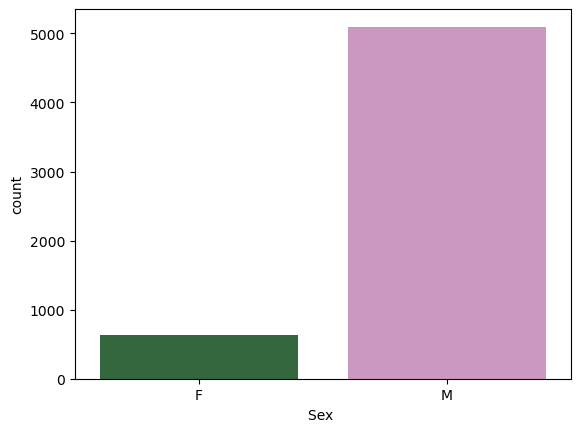

In [31]:
sns.countplot(data=pds_sex, x="Sex ", palette="cubehelix");

In [133]:
pds_sex["Sex "].value_counts()

M    4655
F     575
Name: Sex , dtype: int64

In [33]:
pds_sex["Fatal (Y/N)"].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'y'], dtype=object)

In [34]:
pds_sex.dropna(subset = ['Fatal (Y/N)'], inplace=True)

In [35]:
pds_sex["Fatal (Y/N)"].unique()

array(['N', 'Y', 'M', 'UNKNOWN', '2017', ' N', 'y'], dtype=object)

In [36]:
pds_sex[pds_sex['Fatal (Y/N)'].str.contains('M')]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
285,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m"


In [37]:
pds_sex[pds_sex['Fatal (Y/N)'].str.contains('M')]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
285,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m"


In [38]:
pds_sex[pds_sex['Fatal (Y/N)'].str.contains(' N', regex=True)]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
3942,27-Dec-1960,1960.0,Unprovoked,AUSTRALIA,New South Wales,"Bondi Beach, Sydney",NaN,Mrs. Despo Snow-Christensen,F,27,"Shark brushed past, minor injuries if any",N,NaN,3 m [10'] shark
3944,20-Dec-1960,1960.0,Unprovoked,AUSTRALIA,Queensland,"Colleges Crossing, 54 miles above mouth of th...","Fishing, when line became snagged on rock & he...",Lester McDougall,M,33,Left thigh lacerated,N,09h00,"Grey nurse shark, 1m"
3946,27-Nov-1960,1960.0,Unprovoked,AUSTRALIA,Queensland,"Blacks Beach, 9 miles north of Mackay",Swimming,Harry Bicknell,M,41,Right shoulder lacerated,N,14h45,3' shark
3948,11-Nov-1960,1960.0,Provoked,AUSTRALIA,Queensland,"Scotts Point, Redcliffe Peninsula",Chasing shark out of bathing area while riding...,Ken OConnell,M,17,"Shark knocked him off surf-ski, he inhaled wat...",N,15h00,NaN
3949,06-Nov-1960,1960.0,Unprovoked,AUSTRALIA,Western Australia,Hamelin Bay,"Spearfishing, speared fish retreated to cave w...",Don Morrissey,M,24,Scratches on right upper arm,N,NaN,"Wobbegong shark, 1.8 m [6']"
3951,Nov-1960,1960.0,Provoked,NEW GUINEA,Western District,Toro Passage,NaN,Fisheries trainee,M,NaN,Left wrist bitten by netted shark placed in bo...,N,NaN,"1.4 m [4'6""] blacktip shark"
3956,Oct-1960,1960.0,Unprovoked,PAPUA NEW GUINEA,New Britain,"East Nakanai, Talasea",Collecting shells,NaN,M,26,Injuries to leg & foot,N,NaN,NaN


In [39]:
pds_sex[pds_sex['Fatal (Y/N)'].str.contains('UNKNOWN')]

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
624,08-Sep-2013,2013.0,Unprovoked,USA,South Carolina,"St. Helena Island, Beaufort County",NaN,female,F,NaN,No details,UNKNOWN,NaN,NaN
1270,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,NaN,Jamie Adlington,M,NaN,NaN,UNKNOWN,NaN,"Tiger shark, 2.3m"
2250,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Copacabana, Rio de Janeiro",Bathing,José Luiz Lipiani,M,NaN,NaN,UNKNOWN,NaN,NaN
2260,21-Feb-1997,1997.0,Unprovoked,USA,Hawaii,"Sunset Beach, O'ahu",NaN,Gersome Perreno,M,NaN,No details,UNKNOWN,NaN,NaN
2267,29-Dec-1996,1996.0,Unprovoked,AUSTRALIA,Queensland,Coolum Beach,Surfing,Blair Hall,M,18,NaN,UNKNOWN,18h00,NaN
2307,28-Apr-1996,1996.0,Unprovoked,USA,Hawaii,"La'ie Point, O'ahu",NaN,Wayne Leong,M,NaN,No details,UNKNOWN,NaN,NaN
2328,18-Dec-1995,1995.0,Unprovoked,USA,Hawaii,Southwest of O'ahu,NaN,Carlton Taniyama,M,NaN,No details,UNKNOWN,NaN,NaN
2404,1995,1995.0,Unprovoked,USA,South Carolina,"Pawleys Island, Georgetown County",NaN,male,M,NaN,No details,UNKNOWN,NaN,NaN
2648,1990,1990.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",Surfing,male,M,17,NaN,UNKNOWN,NaN,NaN
2650,03- Dec-1989,1989.0,Unprovoked,AUSTRALIA,Northern Territory,Gove Peninsula near Darwin,NaN,Ryan Johnson,M,17,"No details, ""recovering in Darwin Hospital""",UNKNOWN,NaN,"Tiger shark, 2m"


In [40]:
pds_sex = pds_sex[~pds_sex['Fatal (Y/N)'].str.contains('M')]
pds_sex

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [41]:
pds_sex = pds_sex[~pds_sex['Fatal (Y/N)'].str.contains('2017')]
pds_sex

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [42]:
pds_sex = pds_sex[~pds_sex['Fatal (Y/N)'].str.contains('UNKNOWN')]
pds_sex

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [43]:
pds_sex["Fatal (Y/N)"] = pds_sex["Fatal (Y/N)"].str.replace('y', 'Y')

print(pds_sex["Fatal (Y/N)"])

0       N
1       N
2       N
3       N
4       N
       ..
6297    Y
6298    Y
6299    Y
6300    Y
6301    Y
Name: Fatal (Y/N), Length: 5230, dtype: object


/var/folders/zw/_3ykk0zx0ql2ch8wbzdt6syw0000gn/T/ipykernel_49896/3181639983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pds_sex["Fatal (Y/N)"] = pds_sex["Fatal (Y/N)"].str.replace('y', 'Y')


In [44]:
pds_sex["Fatal (Y/N)"] = pds_sex["Fatal (Y/N)"].str.replace(' N','N')
print(pds_sex["Fatal (Y/N)"])

0       N
1       N
2       N
3       N
4       N
       ..
6297    Y
6298    Y
6299    Y
6300    Y
6301    Y
Name: Fatal (Y/N), Length: 5230, dtype: object


/var/folders/zw/_3ykk0zx0ql2ch8wbzdt6syw0000gn/T/ipykernel_49896/3269297591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pds_sex["Fatal (Y/N)"] = pds_sex["Fatal (Y/N)"].str.replace(' N','N')


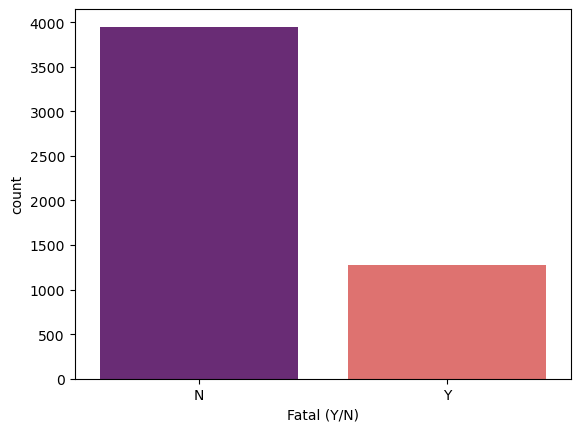

In [45]:
sns.countplot(data=pds_sex, x="Fatal (Y/N)", palette="magma");

In [46]:
pds_sex["Fatal (Y/N)"].value_counts()

N    3950
Y    1280
Name: Fatal (Y/N), dtype: int64

In [141]:
pds_sex["Sex "].value_counts()

M    4655
F     575
Name: Sex , dtype: int64

In [142]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Sex ', ylabel='Count'>

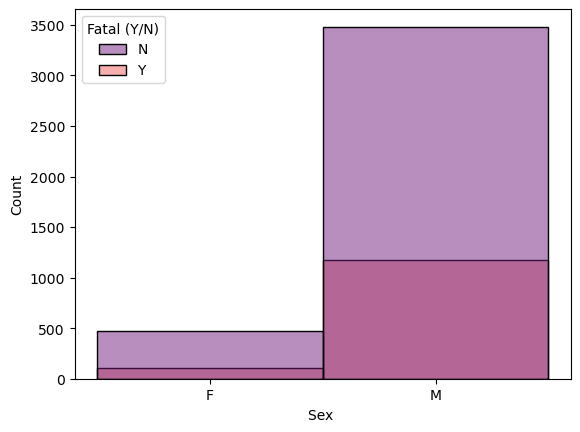

In [143]:
sns.histplot(data=pds_sex, x="Sex ", hue="Fatal (Y/N)", palette="magma")

In [144]:
pds_sex['Sex '].value_counts(normalize=True)

M    0.890057
F    0.109943
Name: Sex , dtype: float64

In [145]:
pds_sex['Sex '].describe()

count     5230
unique       2
top          M
freq      4655
Name: Sex , dtype: object

In [146]:
pds_sex["Fatal (Y/N)"].value_counts(normalize=True)

N    0.755258
Y    0.244742
Name: Fatal (Y/N), dtype: float64

In [147]:
pds_sex["Fatal (Y/N)"].describe()

count     5230
unique       2
top          N
freq      3950
Name: Fatal (Y/N), dtype: object

In [148]:
pds_sex.value_counts(["Sex ","Fatal (Y/N)"])

Sex   Fatal (Y/N)
M     N              3482
      Y              1173
F     N               468
      Y               107
dtype: int64

In [149]:
pds.columns = pds.columns.str.replace('Sex ', 'Sex')
pds

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [150]:
pds.columns = pds_sex.columns.str.replace('Sex ', 'Sex')
pds_sex

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [156]:
pds_age.groupby('Fatal (Y/N)', as_index=False).agg("Sex")

In [159]:
to_drop = ['Date','Year','Type','Country','Area','Location','Activity','Name','Age','Injury', 'Time', 'Species ']
pds_sex.drop(to_drop, inplace=True, axis=1)

In [160]:
pds_sex

,Sex,Fatal (Y/N)
0,F,N
1,F,N
2,M,N
3,M,N
4,M,N
...,...,...
6297,M,Y
6298,M,Y
6299,M,Y
6300,M,Y


In [161]:
pds_sex.value_counts()

Sex   Fatal (Y/N)
M     N              3482
      Y              1173
F     N               468
      Y               107
dtype: int64

In [165]:
data_men = {'Sex ': ['M', 'M'], 
        'Fatal (Y/N)': ['N', 'Y'], 
        'Count': [3482, 1173]}
df = pd.DataFrame(data_men)

grouped = df.groupby(['Sex ', 'Fatal (Y/N)'])

result_men = grouped.agg({'Count': ['sum'], 
                      'Sex ': ['count'], 
                      'Fatal (Y/N)': ['first']}).reset_index()

result_men['Percentage'] = result_men['Count']['sum'] / result_men['Count']['sum'].sum() * 100

result_men

,Sex,Fatal (Y/N),Count,Sex,Fatal (Y/N),Percentage
,,,sum,count,first,
0,M,N,3482,1,N,74.801289
1,M,Y,1173,1,Y,25.198711


In [166]:
data_female = {'Sex ': ['F', 'F'], 
        'Fatal (Y/N)': ['N', 'Y'], 
        'Count': [468, 107]}
df = pd.DataFrame(data_female)

grouped = df.groupby(['Sex ', 'Fatal (Y/N)'])

result_female = grouped.agg({'Count': ['sum'], 
                      'Sex ': ['count'], 
                      'Fatal (Y/N)': ['first']}).reset_index()

result_female['Percentage'] = result_female['Count']['sum'] / result_female['Count']['sum'].sum() * 100

result_female

,Sex,Fatal (Y/N),Count,Sex,Fatal (Y/N),Percentage
,,,sum,count,first,
0,F,N,468,1,N,81.391304
1,F,Y,107,1,Y,18.608696


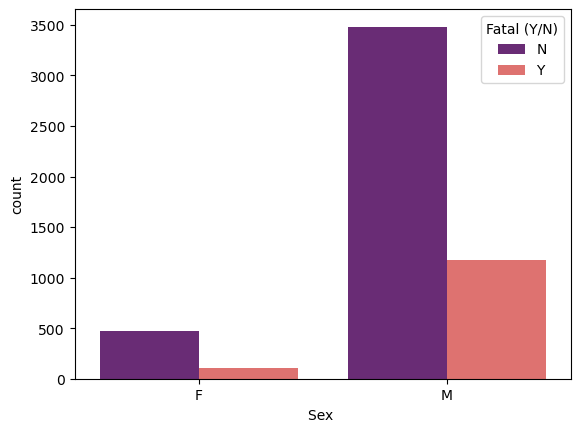

In [158]:
sns.countplot(x="Sex ", hue="Fatal (Y/N)", data = pds_sex, palette="magma");

In [167]:
pds_sex.to_csv("clean_h1.csv", index=False)